In [75]:
import os
import random 
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud



In [66]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

In [10]:
Dataset_location = "D:\depression_suicide_project\Pretrained_embedding_models\dataset"
CSSR_DIR = "\suicide\CSSRS"

In [15]:
CORPUS_DIR

'C:\\Users\\Teacher/Documents/mental_health/suicide/'

In [32]:
# CORPUS_DIR = os.path.expanduser('~') + '/Documents/mental_health/suicide/'
CORPUS_DIR = "D:\depression_suicide_project\Pretrained_embedding_models\dataset\suicide"
CORPUS_NAME = 'Suicide_Detection.csv'
CORPUS_PATH = CORPUS_DIR + CORPUS_NAME
PROCESSED_CORPUS = 'Suicide_Detection_processed.csv'
PICKLED_CORPUS = 'Suicide_Detection_scatter.pkl'
SCATTERTEXT_FILE = 'Reddit_ScattertextRankDataJitter.html'
CORPUS_EQUAL_CLASS = 'Suicide_Detection_processed_equal_class.csv'
CSSR_DATASET = '500_Reddit_users_posts_labels.csv'
CSSR_DIR = CORPUS_DIR + '\CSSRS'
BEST_ENTITIES = ['high school', 'mental health', 'best friend', 'feel like', 'really want', 'suicide thought',
                 'friend family']
CSSR_CAT = ['Indicator', 'Attempt','Behavior','Ideation']
CSSR_FILES = ['suicidal_indicator.csv', 'suicidal_attempt.csv', 'suicidal_behavior.csv', 'suicidal_ideation.csv']


In [41]:
CSSR_DIR

'D:\\depression_suicide_project\\Pretrained_embedding_models\\dataset\\suicide\\CSSRS'

In [34]:
Le = LabelEncoder()
lemme = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))

In [96]:
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

In [38]:
def process(text):
    text = text.lower()
    text = re.sub('\W+', ' ', text)
    text = [x for x in [lemme.lemmatize(w) for w in text.split()] if x not in stop_words_nltk]
    return ' '.join(text)

def prepare_main_dataset():
    file_path = os.path.join(CSSR_DIR+'\\'+CSSR_DATASET)
    df = pd.read_csv(file_path)
    df['Post'] = df.Post.apply(lambda sample: process(sample))
    df=df.dropna()
    df.reset_index()
    df['code'] = Le.fit_transform(df['Label'])
    df.to_csv(CSSR_DIR + PROCESSED_CORPUS)
    return df

In [40]:
prepare_main_dataset()

,User,Post,Label,code
0,user-0,viable option youll leaving wife behind youd p...,Supportive,4
1,user-1,hard appreciate notion could meet someone else...,Ideation,2
2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1
3,user-3,tried kill self failed badly cause moment want...,Attempt,0
4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...,...
495,user-495,end feel way least doesnt entire lifetime fix ...,Supportive,4
496,user-496,wa skype call ended ventricular dysfunction le...,Indicator,3
497,user-497,sound really weird maybe distractibility somet...,Supportive,4
498,user-498,dont know dumb sound feel hyperactive behavior...,Attempt,0


In [44]:
file_path = CSSR_DIR + '\\' + PROCESSED_CORPUS

In [46]:
f = pd.read_csv(file_path)

In [47]:
f.head()

,Unnamed: 0,User,Post,Label,code
0,0,user-0,viable option youll leaving wife behind youd p...,Supportive,4
1,1,user-1,hard appreciate notion could meet someone else...,Ideation,2
2,2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1
3,3,user-3,tried kill self failed badly cause moment want...,Attempt,0
4,4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2


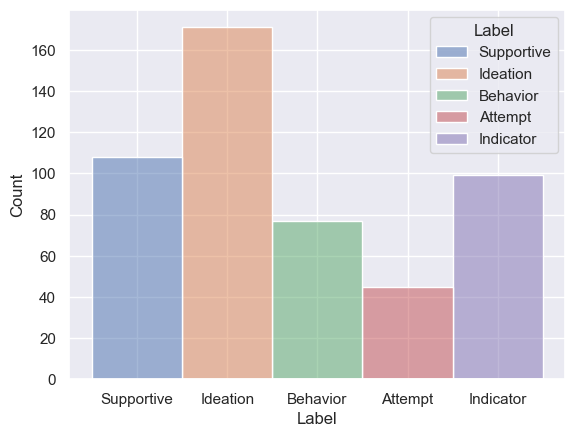

In [60]:
sns.histplot(data=f, x="Label", kde=True, hue = "Label")
plt.show()

In [64]:
f['sent_len'] = f.Post.apply(lambda x: len([w for w in str(x).split()]))

In [65]:
f

,Unnamed: 0,User,Post,Label,code,sent_len
0,0,user-0,viable option youll leaving wife behind youd p...,Supportive,4,69
1,1,user-1,hard appreciate notion could meet someone else...,Ideation,2,992
2,2,user-2,hi last night wa sitting ledge window contempl...,Behavior,1,221
3,3,user-3,tried kill self failed badly cause moment want...,Attempt,0,424
4,4,user-4,hi nem3030 sort thing enjoy personally always ...,Ideation,2,106
...,...,...,...,...,...,...
495,495,user-495,end feel way least doesnt entire lifetime fix ...,Supportive,4,552
496,496,user-496,wa skype call ended ventricular dysfunction le...,Indicator,3,227
497,497,user-497,sound really weird maybe distractibility somet...,Supportive,4,2968
498,498,user-498,dont know dumb sound feel hyperactive behavior...,Attempt,0,221


In [71]:
# transposing the rows to column
res = f.pivot(columns='Label', values='sent_len')

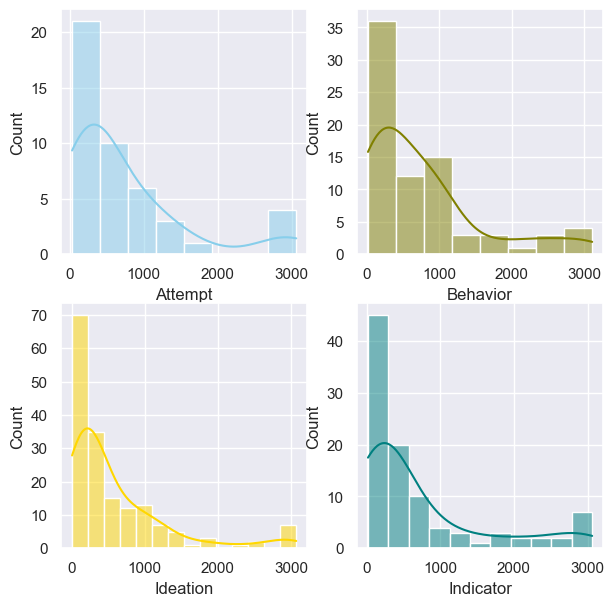

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=res, x="Attempt", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=res, x="Behavior", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=res, x="Ideation", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=res, x="Indicator", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [87]:
CSSR_CAT = ['Indicator', 'Attempt','Behavior','Ideation']
CSSR_FILES = ['suicidal_indicator.csv', 'suicidal_attempt.csv', 
              'suicidal_behavior.csv', 'suicidal_ideation.csv']

In [113]:
def gen_wordcloud(indx):
    frame = pd.read_csv(CSSR_DIR + '\\' + CSSR_FILES[indx], index_col=0)
    col_name = list(frame.columns)
    text = ' '.join(col_name)
    wc = WordCloud(width = 500, height = 300, background_color = "white", 
                   colormap = "magma", max_words = 50)
    wc.generate(text)

    plt.axis("off")
    plt.imshow(wc, interpolation = "bilinear")


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


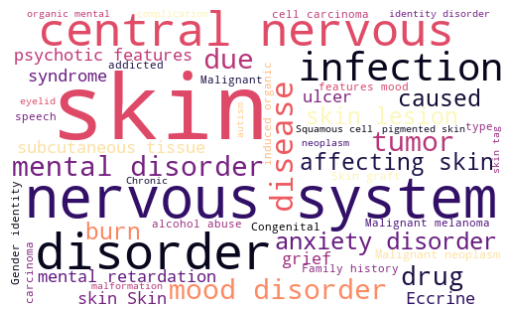

In [114]:
# Indicator
gen_wordcloud(0)

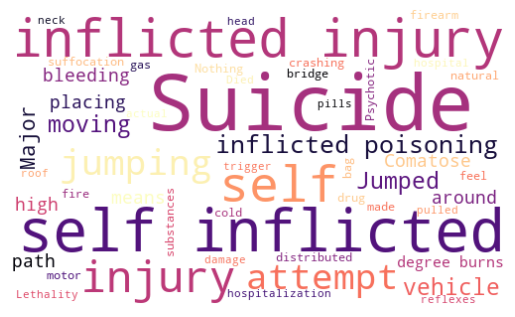

In [92]:
# Attempt
gen_wordcloud(1)

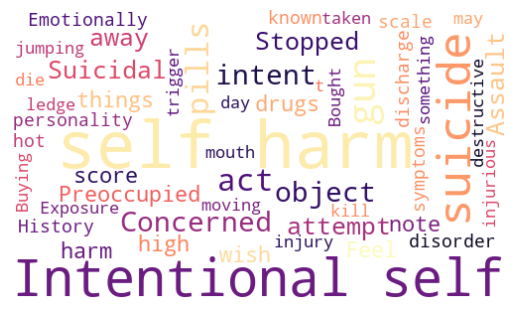

In [93]:
# Behavior
gen_wordcloud(2)

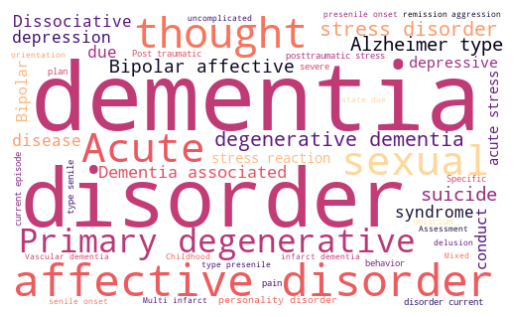

In [94]:
# Ideation
gen_wordcloud(3)

### Model building (Step 4)
#### The next step is to train the unsupervised machine learning model on the data. 
#### LdaMulticore, which uses all CPU cores to parallelize and speed up model training. 
#### Tried gensim.models.ldamodel.LdaModel class which is an equivalent, but single-core implementation.

In [98]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim


In [ ]:
stopwords.extend()

In [121]:
ind = f[f['Label']=='Indicator']
att = f[f['Label']=='Attempt']
beh = f[f['Label']=='Behavior']
ide = f[f['Label']=='Ideation']

## https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [183]:
# Our spaCy model:
nlp = en_core_web_md.load()

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

In [184]:
ind['Post']

10     dont man seriously making sad dont know feel l...
26     place could use cleaning dont think make evil ...
37     hmm state im canada im lucky enough get free h...
53     search someone like always someone similar pro...
64     need sponsor like recovering drug addict someo...
                             ...                        
480    yes really guess roy fe6 link ww link exact di...
483    wa cellphone number called able wa call didnt ...
485    excited thank awesome haha wish faith im excit...
493    honesty though wa literally prison nobody wa a...
496    wa skype call ended ventricular dysfunction le...
Name: Post, Length: 99, dtype: object

In [185]:
for summary in nlp.pipe(ind['Post']):
    proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
    tokens.append(proj_tok)

In [177]:
# remove words less than 3 characters
collect_text = []
collector = []
for items in tokens:
    for i in items:
        if len(i) > 2:
            collect_text.append(i)
        else:
            collect_text.append([])
    collector.append(collect_text)
    collect_text = []
            

In [186]:
# Add tokens to new column
ind['tokens'] = tokens

C:\Users\Teacher\AppData\Local\Temp\ipykernel_13924\147558474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['tokens'] = tokens


In [187]:
# Create dictionary
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(ind['tokens'])
print(dictionary.token2id)

{'body': 0, 'dad': 1, 'doe': 2, 'fail': 3, 'feel': 4, 'figure': 5, 'get': 6, 'kill': 7, 'know': 8, 'like': 9, 'make': 10, 'man': 11, 'miss': 12, 'need': 13, 'offer': 14, 'pain': 15, 'sad': 16, 'think': 17, 'time': 18, 've': 19, 'wa': 20, 'want': 21, 'year': 22, 'ability': 23, 'able': 24, 'abusive': 25, 'accept': 26, 'accident': 27, 'accomplishment': 28, 'achieve': 29, 'acknowledge': 30, 'action': 31, 'activity': 32, 'admit': 33, 'adult': 34, 'adversity': 35, 'advice': 36, 'affect': 37, 'alcohol': 38, 'alter': 39, 'amazing': 40, 'ambiguous': 41, 'ambition': 42, 'ankle': 43, 'annoy': 44, 'answer': 45, 'anxiety': 46, 'anytime': 47, 'apologize': 48, 'appreciate': 49, 'argue': 50, 'argument': 51, 'ashame': 52, 'ask': 53, 'aspect': 54, 'asshole': 55, 'assistance': 56, 'asthenia': 57, 'attack': 58, 'attention': 59, 'attest': 60, 'avoid': 61, 'aware': 62, 'awesome': 63, 'awful': 64, 'awkward': 65, 'bad': 66, 'bar': 67, 'bear': 68, 'begin': 69, 'believe': 70, 'betray': 71, 'bipolar': 72, 'blame

In [188]:
# Filter dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in ind['tokens']]

# LDA model building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)


In [197]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('anymore', 1),
  ('anyone', 1),
  ('body', 1),
  ('dad', 1),
  ('dearly', 1),
  ('didnt', 1),
  ('doe', 1),
  ('dont', 1),
  ('everyone', 1),
  ('failing', 1),
  ('feel', 1),
  ('figure', 1)]]

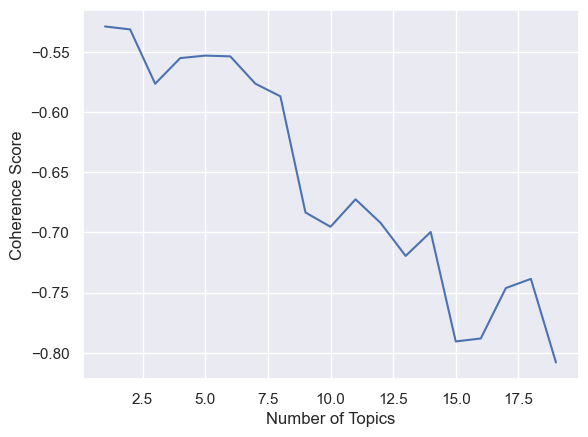

In [189]:
# Coherence score using C_umass:
topics = []
score = []
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

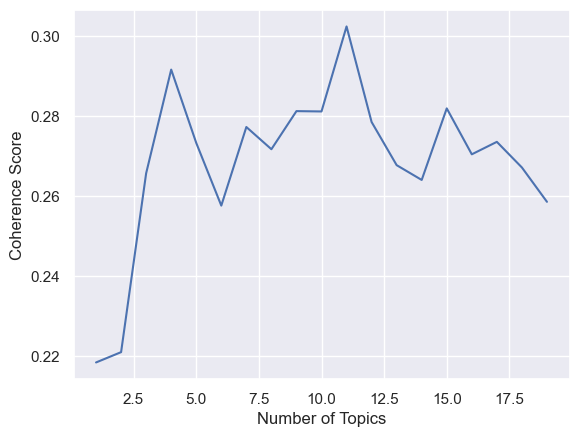

In [191]:
# Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, texts = ind['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [192]:
# Optimal model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=4, workers = 4, passes=100)


In [193]:
# Print topics
lda_model.print_topics(-1)

[(0,
  '0.020*"job" + 0.014*"person" + 0.013*"family" + 0.009*"school" + 0.009*"ll" + 0.009*"change" + 0.008*"situation" + 0.008*"like" + 0.008*"money" + 0.007*"pay"'),
 (1,
  '0.016*"like" + 0.012*"sound" + 0.011*"sorry" + 0.009*"lot" + 0.007*"thank" + 0.007*"d" + 0.007*"pain" + 0.007*"depression" + 0.007*"tired" + 0.007*"hear"'),
 (2,
  '0.014*"live" + 0.010*"end" + 0.010*"girl" + 0.008*"world" + 0.008*"change" + 0.007*"school" + 0.007*"person" + 0.007*"college" + 0.007*"depression" + 0.007*"great"'),
 (3,
  '0.060*"behavior" + 0.057*"hyperactive" + 0.016*"mood" + 0.009*"man" + 0.009*"irritable" + 0.008*"hey" + 0.008*"shit" + 0.007*"little" + 0.007*"world" + 0.007*"mental"')]

In [195]:
# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


In [196]:
# Save the report
file_path = CSSR_DIR + '\\' + 'index.html'
pyLDAvis.save_html(lda_display, file_path)

In [128]:
# Indicator
frame = pd.read_csv(CSSR_DIR + '\\' + CSSR_FILES[0], index_col=0)
col_name = list(frame.columns)

# Turn the list of string into a list of tokens
tweets = [t.split() for t in col_name]

In [80]:
    for items in CSSR_FILES:
        frame = pd.read_csv(CSSR_DIR + '\\' + items, index_col=0)
        col_name = list(frame.columns)
        break

In [42]:


def generate_dataset(classes, res):
    data = []
    category = []
    for sample in res:
        data.append(''.join(sample))
        category.append(classes)
    return pd.DataFrame(zip(data, category), columns=['Post', 'Label'])

def generate_samples(sentence_num):
    index = 0
    dataset = pd.DataFrame()
    size = 1
    
    for items in CSSR_FILES:
        frame = pd.read_csv(CSSR_DIR + items, index_col=0)
        col_name = list(frame.columns)
        # Making the class evenly distributed
#         if index == 0:
#             size = 4
#         elif index == 1:
#             size = 52
#         elif index == 3:
#             size = 14
#         else:
#             size = 45
        for k in range(size):
            temp = [col_name[items:items + sentence_num] 
                    for items in range(0, len(col_name), sentence_num)]
            dataset = pd.concat([dataset, generate_dataset(CSSR_CAT[index], temp)])
            random.shuffle(col_name)
        index += 1
    return dataset.sample(frac=1)


def generate_dataframe(sent_size):
    x = generate_samples(sent_size)
    x = pd.concat([prepare_main_dataset(), x])
    x = x[['Post','Label','code']]
    x['code'] = Le.fit_transform(x['Label'])
    return x

In [43]:
generate_dataframe(30)

,Post,Label,code
0,viable option youll leaving wife behind youd p...,Supportive,4
1,hard appreciate notion could meet someone else...,Ideation,2
2,hi last night wa sitting ledge window contempl...,Behavior,1
3,tried kill self failed badly cause moment want...,Attempt,0
4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...
7,Anaplastic astrocytoma of central nervous sys...,Indicator,3
37,Neonatal staphylococcal infection of skin Per...,Indicator,3
14,Cannabis-induced anxiety disorder Psychoactiv...,Indicator,3
48,Addicted to liquor alcohol addiction alcohol ...,Indicator,3
